<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/%D0%94%D0%97.2/BarbachinTFe-01-20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B02%2C1-2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

Задача 1 Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: Р0=13 МПа; t0=540 °С; Рк=5 кПа. Параметры промперегрева: Рпп=1, 2, 3, 4, 5, 6 МПа; tпп=540 °С.

Ответ на задачу 2.1 =  [44.786, 45.17, 45.222, 45.16, 45.043, 44.897]


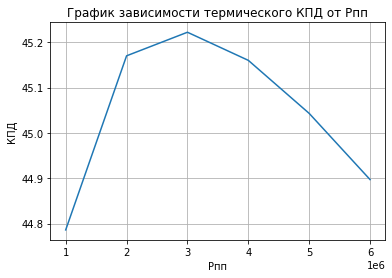

In [92]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def multiply1(x):
    return x * 10**6
#Начальные параметры 
p_0 = 13 * MPa
t_0 = to_kelvin(540)
p_k = 5 * kPa
p_middle = [1,2,3,4,5,6]
t_middle = to_kelvin(540)
p_middle = list(map(multiply1,p_middle))

def eff (p_0, t_0, p_k, p_middle, t_middle): 
    point_0_start = gas(P = p_0 * unit, T = t_0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=p_k * unit, s=point_1_start.s)
    point_pump = gas(P=p_k * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = round(useful_energy/full_energy*100,3)    
    return efficiency

effpp = []
for pm_value in p_middle:
  effpp.append(eff(p_0, t_0, p_k, pm_value, t_middle))

print('Ответ на задачу 2.1 = ', effpp)

X = p_middle
Y = effpp
plt.plot(X,Y)
plt.grid(True)
plt.title('График зависимости термического КПД от Pпп')
plt.ylabel('КПД')
plt.xlabel('Pпп')
plt.show()


Задача 2 Написать код для решения задачи оптимизации параметров промежуточного перегрева Pпп и tпп для свободных начальных параметров Р0, t0, Рк. Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара. Решение должно выдавать параметры промежуточного перегрева и термический КПД при них.

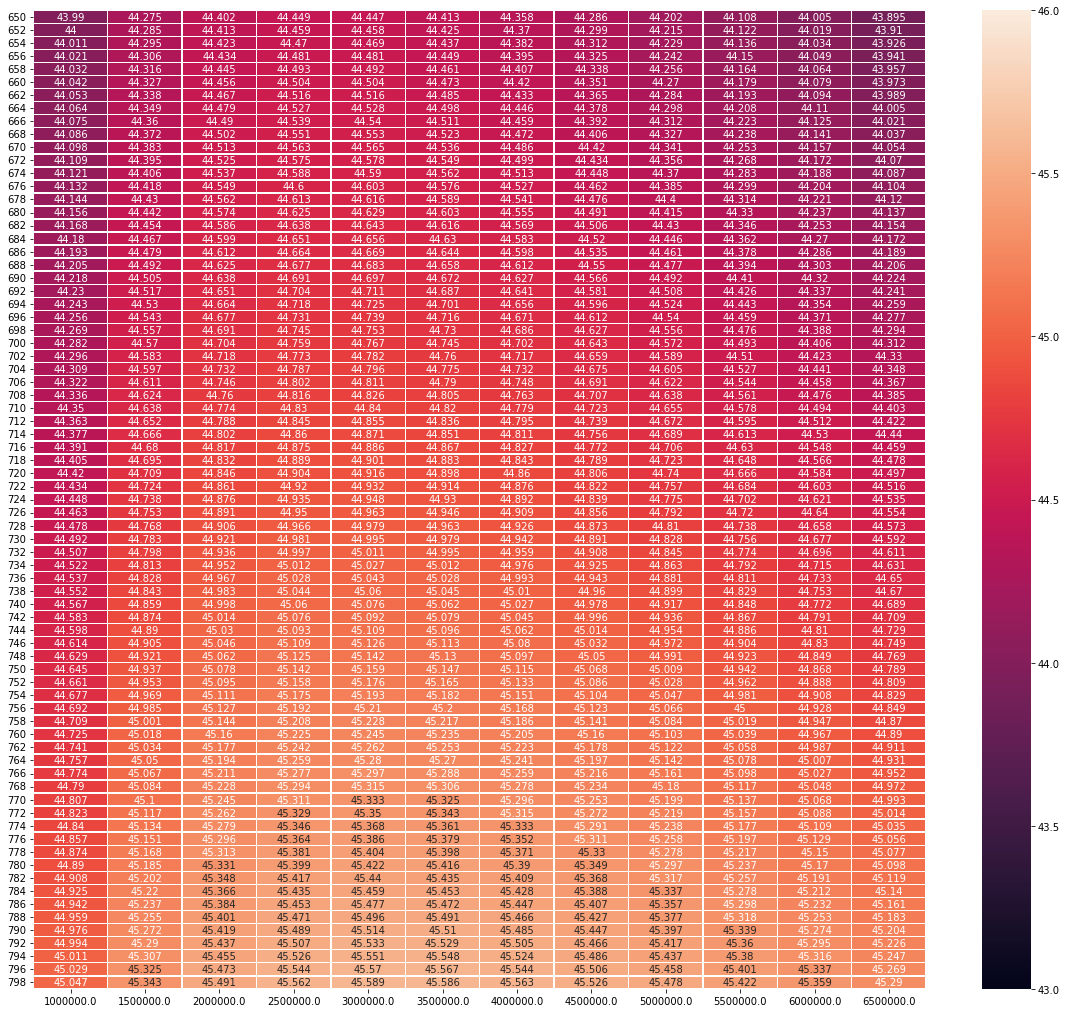

In [128]:
#@title Входные параметры
P0 = 15 #@param {type:"number"}
t0 = 550 #@param {type:"number"}
Pk = 5 #@param {type:"number"}

import iapws
from iapws import IAPWS97 as gas

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def multiply1(x):
    return x * 10**6
#Начальные параметры 
P0 *= MPa
t0 = to_kelvin(t0)
Pk *= kPa
p_middle = list(np.arange(1, 7, 0.5))
t_middle = list(np.arange(650, 800, 2))
p_middle = list(map(multiply1,p_middle))

def eff (P0, t0, Pk, p_middle, t_middle): 
    point_0_start = gas(P = P0 * unit, T = t0)
    point_0_end = gas(P=p_middle * unit, s=point_0_start.s)
    point_1_start = gas(P=p_middle * unit, T=t_middle)
    point_condenser = gas(P=Pk * unit, s=point_1_start.s)
    point_pump = gas(P=Pk * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = round(useful_energy/full_energy*100,3)    
    return efficiency

effpp = dict()
for tmvalue in t_middle:
    effpp[tmvalue]= []
    for pmvalue in p_middle:
        effpp[tmvalue].append(eff(P0, t0, Pk, pmvalue, tmvalue))

#print('Ответ на задачу 2.2 = ', effpp)


import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(20, 18)
sns.heatmap(list(effpp.values()), annot = True, fmt='g', linewidths=.5,  xticklabels=p_middle, yticklabels=t_middle,vmin=43, vmax=46)

Задача 3 При удельных расходах водяного пара d01 = 3,0 кг/(кВт·ч) и d02 = 3,6 кг/(кВт·ч) оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальпий h0 – hпв = 2500 кДж/кг.

In [89]:
d01 = 3
d02 = 3.6
q1 = 2500 #h0-hпв
#удельные расходы теплоты
q_1 = d01*q1 
q_2 = d02 * q1
print('Ответ на задачу 2.3 =',q_1, 'и', q_2)

Ответ на задачу 2.3 = 7500 и 9000.0
